<a href="https://colab.research.google.com/github/ParkJeongUng/Ung.github.io/blob/master/_notebooks/_PUBG_%EC%A0%84%EC%B2%98%EB%A6%AC_%EC%97%B0%EC%8A%B5_query.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PUBG // 전처리 연습 // query

## 데이터 불러오기

In [ ]:
pip install kaggle --upgrade

In [ ]:
!pip install kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle.json': b'{"username":"chobocoder","key":"e79bebe8d4ae3d272cdb108fc8f25832"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c pubg-finish-placement-prediction

train_V2.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
test_V2.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
sample_submission_V2.csv.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import pandas as pd
train = pd.read_csv('train_V2.csv.zip')
test = pd.read_csv('test_V2.csv.zip')

## 데이터 확인
* DBNOs - 적을 기절시킨 횟수
* assists - 적을 죽이는데 도움을 준 횟수
* boosts - 드링크, 진통제 사용 횟수
* damageDealt - 딜량(적에게 준 총 피해량)(자해 데미지는 감산됨)
* headshotKills - 헤드샷으로 적을 죽인 횟수
* heals - 회복 아이템 사용 횟수
* Id - 플레이어 ID
* killPlace - Ranking in match of number of enemy players killed.
* killPoints - 킬을 기반으로 한 레이팅(점수) (랭크포인트에 -1 이외의 값이 있는 경우 killPoints의 0은 "없음"으로 간주해야 합니다.)
* killStreaks - 단 시간내에 사살한 적플레이어의 수
* kills - 사살한 적 플레이어의 수
* longestKill - 적을 사살했을 때 적 플레이어와 자신 사이의 거리(적을 사살하고 차를 몰고 떠나면 거리가 늘어나기 때문에 오차가 생길 수 있음)
* matchDuration - 진행된 게임의 시간 (단위 - 초)
* matchId - 매치를 구별하기 위한 매치ID
* matchType - 게임의 유형(모드)“solo(1명)”, “duo(2명)”, “squad(4명)”, “solo-fpp(1명 1인칭)”, “duo-fpp(2명 2인칭)”, and “squad-fpp(4명 1인칭)”; 나머지는 이벤트 모드
* rankPoints - 레이팅(점수) 랭킹을 나타내는 지표 -1값은 "없음"을 나타내는 값
* revives - 이 플레이어가 팀을 부활시킨 횟수
* rideDistance - 차량으로 이동한 총 거리 (단위 - 미터)
* roadKills - 차량에 탑승한 동안 적을 죽인 횟수
* swimDistance - 수영으로 이동한 총 거리 (단위 - 미터)
* teamKills - 팀을 죽인 횟수
* vehicleDestroys - 차량을 파괴한 횟수
* walkDistance - 걸어서 다닌 거리 (단위 - 미터)
* weaponsAcquired - 무기를 습득한 횟수
* winPoints - 우승 기반 레이팅(점수) 적 사살횟수와 상관없는 승리 중심의 레이팅(rankPoints에 -1 이외의 값이 있는 경우 winPoints의 0은 "없음"으로 간주해야 합니다.)
* groupId - 그룹을 식별하는 ID. 같은 그룹 이라도 다른 게임이라면 서로 다른 그룹아이디를 가짐. ex) 같은 듀오라도 첫판은 4d4b580de459be 두번째판은 684d5656442f9e 이런식으로 다른 그룹ID를 가짐
* numGroups - 한 매치에 속한 그룹의 수(그룹ID의 수)
* maxPlace - 꼴찌 팀의 순위(중간에 나가는 그룹이 있어서 numGroups 와 다를 수 있음)
* winPlacePerc - 예측 타겟 데이터 백분위수를 기준으로 우승 순위를 배치 1은 1위에 해당하고 0은 꼴찌에 해당 maxPlace 를 기준으로 계산하므로 누락된 chunks 가 있을수 있다.

In [ ]:
train.head().T

,0,1,2,3,4
Id,7f96b2f878858a,eef90569b9d03c,1eaf90ac73de72,4616d365dd2853,315c96c26c9aac
groupId,4d4b580de459be,684d5656442f9e,6a4a42c3245a74,a930a9c79cd721,de04010b3458dd
matchId,a10357fd1a4a91,aeb375fc57110c,110163d8bb94ae,f1f1f4ef412d7e,6dc8ff871e21e6
assists,0,0,1,0,0
boosts,0,0,0,0,0
damageDealt,0,91.47,68,32.9,100
DBNOs,0,0,0,0,0
headshotKills,0,0,0,0,0
heals,0,0,0,0,0
killPlace,60,57,47,75,45


## 결측치 제거

In [ ]:
train.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [ ]:
train = train.dropna(how = 'any')

In [ ]:
train.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
dtype: int64

In [ ]:
test.isnull().sum() # 테스트 세트는 결측치 없음

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
dtype: int64

## 하고 싶은대로 다 해보기


### 1. 무기도 못줍고 이동거리 없는 잠수충 변수 생성

In [ ]:
# 총 이동거리 변수 생성
train['total_distance'] = train['swimDistance'] + train['rideDistance'] + train['walkDistance']
test['total_distance'] = test['swimDistance'] + test['rideDistance'] + test['walkDistance']

In [ ]:
sleep_user_index = train.query('total_distance == 0 and weaponsAcquired == 0 and damageDealt == 0').index
sleep_user = train.index.isin(sleep_user_index)
train['sleep_user'] = sleep_user
train.head().T

sleep_user_index = test.query('total_distance == 0 and weaponsAcquired == 0 and damageDealt == 0').index
sleep_user = test.index.isin(sleep_user_index)
test['sleep_user'] = sleep_user

### 2. 솔로에는 기절이 없다 (3년 전 기준)

In [ ]:
print(train.matchType.unique())
# 이벤트모드 많이 없을줄 알았지만 많다
# 결론적으로 솔로는 기절 없으니까 다 처리해주자

['squad-fpp' 'duo' 'solo-fpp' 'squad' 'duo-fpp' 'solo' 'normal-squad-fpp'
 'crashfpp' 'flaretpp' 'normal-solo-fpp' 'flarefpp' 'normal-duo-fpp'
 'normal-duo' 'normal-squad' 'crashtpp' 'normal-solo']


Int64Index([     29,     116,     151,     237,     283,     404,     520,
                606,     619,     638,
            ...
            4446585, 4446592, 4446618, 4446650, 4446743, 4446779, 4446843,
            4446849, 4446926, 4446958],
           dtype='int64', length=76645)

In [ ]:
solo_index = train.query('matchType.str.contains("solo") and DBNOs == 0', engine = 'python').index
train.at[solo_index, 'DBNOs'] = -1

solo_index = test.query('matchType.str.contains("solo") and DBNOs == 0', engine = 'python').index
test.at[solo_index, 'DBNOs'] = -1

In [ ]:
train.head().T

,0,1,2,3,4
Id,7f96b2f878858a,eef90569b9d03c,1eaf90ac73de72,4616d365dd2853,315c96c26c9aac
groupId,4d4b580de459be,684d5656442f9e,6a4a42c3245a74,a930a9c79cd721,de04010b3458dd
matchId,a10357fd1a4a91,aeb375fc57110c,110163d8bb94ae,f1f1f4ef412d7e,6dc8ff871e21e6
assists,0,0,1,0,0
boosts,0,0,0,0,0
damageDealt,0,91.47,68,32.9,100
DBNOs,0,0,0,0,0
headshotKills,0,0,0,0,0
heals,0,0,0,0,0
killPlace,60,57,47,75,45


## 핵쟁이를 잡기 위한 노력
1. 에임핵 --> killPoints, headshotKills, Kills, damageDealt
2. 스피드핵 --> ridedistance, swimdistance, walkdistance
3. 자동회복 무적핵 --> 무기를 안먹었는데 부스트랑 힐이 없다 --> 
4. 소환술 --> 이동거리가 적은데 킬수가 많다 --> distance, kill
5. 에임봇 --> 자동으로 적에게 조준 거리 상관 없음 --> longestkill
6. 자기장 조종 --> 바다쪽으로 잡아서 혼자 가만히 수영하고 있는 경우가 있다 --> 수영 거리랑 딜량을 보자 --> swimdistance, damageDealt
7. 아이템esp --> 아이템 위치를 나타내줌 --> weaponsAcquired

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def show_countplot(column):
    plt.figure(figsize=(12,4))
    sns.countplot(data=train, x=column).set_title(column)
    plt.show()
    
def show_distplot(column):
    plt.figure(figsize=(12, 4))
    sns.distplot(train[column], bins=50)
    plt.show()

### 소환술 --> 이동거리가 적은데 킬수가 많다 --> distance, kill

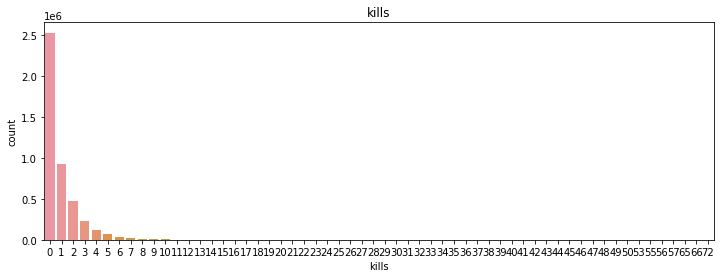

In [ ]:
show_countplot('kills')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


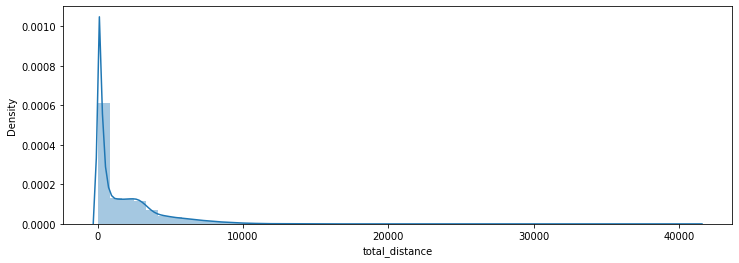

In [ ]:
show_distplot('total_distance')
# 이동거리가 400 km 가 넘어가는 데이터가 존재한다

In [ ]:
# 킬수가 비정상적으로 많은데 이동거리가 짧은경우는 많다
ex = train.query('kills > 30 and total_distance < 5000')
ex

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,total_distance
57978,9d8253e21ccbbd,ef7135ed856cd8,37f05e2a01015f,9,0,3725.0,0,7,0,2,1000,35,3,105.80,1798,normal-duo-fpp,8,7,-1,0,0.0,0,0.0,0,0,48.82,48,1500,0.8571,48.82
87793,45f76442384931,b3627758941d34,37f05e2a01015f,8,0,3087.0,0,8,27,3,1000,31,3,95.34,1798,normal-duo-fpp,8,7,-1,0,0.0,0,0.0,0,0,780.70,45,1500,1.0000,780.70
156599,746aa7eabf7c86,5723e7d8250da3,f900de1ec39fa5,21,0,5479.0,0,12,7,4,0,48,6,81.95,1798,normal-solo-fpp,11,11,1500,0,0.0,0,0.0,0,0,23.71,61,0,0.7000,23.71
160254,15622257cb44e2,1a513eeecfe724,db413c7c48292c,1,0,4033.0,0,40,0,1,1000,42,5,266.20,844,normal-squad-fpp,8,8,-1,0,0.0,0,0.0,1,0,718.30,16,1500,1.0000,718.30
180189,1355613d43e2d0,f863cd38c61dbf,39c442628f5df5,5,0,3171.0,0,6,15,1,0,35,3,102.50,1796,normal-solo-fpp,9,6,1500,0,0.0,0,0.0,0,0,71.51,41,0,1.0000,71.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4021018,1f1c3dda0296df,7c95f475fd2cdb,a9e84c456cc859,6,0,3406.0,0,8,10,2,0,31,3,103.50,1795,normal-solo-fpp,13,10,1500,0,1553.0,0,0.0,0,0,2264.00,40,0,0.9167,3817.00
4127904,f699c842c5dfab,9d69e4e697d296,1ac375e4121651,5,0,3420.0,39,20,1,1,1000,33,7,248.40,1264,normal-squad-fpp,5,5,-1,0,0.0,0,0.0,0,0,319.20,29,1500,0.7500,319.20
4148675,5283367a7f8d06,35b9b765110fd2,f900de1ec39fa5,12,0,3050.0,0,5,4,7,0,31,7,48.52,1798,normal-solo-fpp,11,11,1500,0,0.0,0,0.0,0,0,123.80,89,0,0.4000,123.80
4235682,6874be9215646b,af1d17223258d0,0f09bd72c4ba97,1,0,3006.0,0,9,18,2,1000,33,2,150.30,1794,normal-squad-fpp,8,8,-1,0,0.0,0,0.0,0,0,557.50,20,1500,0.4286,557.50


In [ ]:
# 하지만 그런경우는 모든 데이터가 노말모드에 속한다
ex = train.query('kills > 30 and total_distance < 5000 and (matchType.str.startswith("solo") or matchType.str.startswith("duo") or matchType.str.startswith("squad"))',engine = 'python')
ex

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,total_distance


In [ ]:
# 킬수가 비정상적으로 많은데 매치타입이 이벤트모드가 아닐경우 --> 1명 존재 기록이 조금 수상하다
exindex = train.query('kills > 30 and (matchType.str.startswith("solo") or matchType.str.startswith("duo") or matchType.str.startswith("squad"))',engine = 'python').index
train = train.drop(exindex)
exindex

Int64Index([3840888], dtype='int64')

### 에임핵 --> 킬수가 많은데 헤드샷 비율이 비정상적으로 높음

In [ ]:
train['headshot_rate'] = train.headshotKills / train.kills
train['headshot_rate'] = train.headshot_rate.fillna(0)
test['headshot_rate'] = test.headshotKills / test.kills
test['headshot_rate'] = test.headshot_rate.fillna(0)

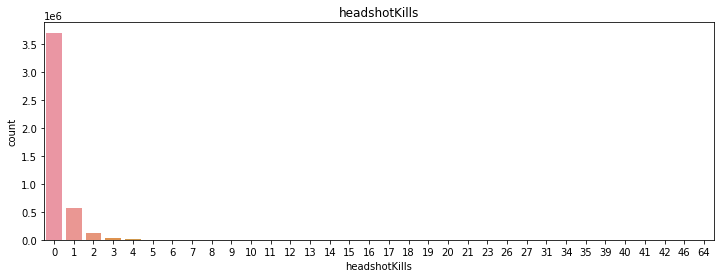

In [ ]:
show_countplot('headshotKills')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


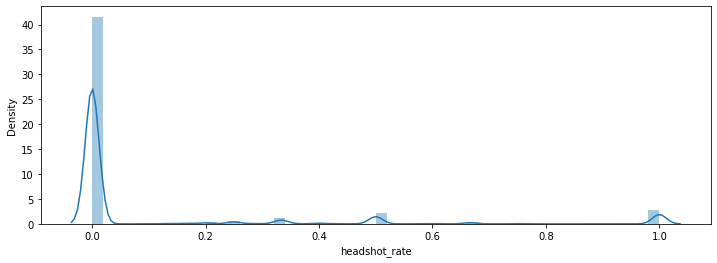

In [ ]:
show_distplot('headshot_rate')

In [ ]:
# 킬도 어느정도 많은데 헤드샷 비율이 너무 높으면서 이벤트매치가 아닌경우 --> 얘네를 그냥 잘한다고 봐도될까?
ex = train.query('headshot_rate > 0.90 and kills > 15 and (matchType.str.startswith("solo") or matchType.str.startswith("duo") or matchType.str.startswith("squad"))',engine = 'python')
ex

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,total_distance,swimmer,hiker,heals_boosts,headshot_rate
539354,777a59f7dceb9c,1be852f783b980,d89c28b6a06ec5,0,0,1800.0,0,17,7,1,1023,18,11,36.76,1389,solo,85,66,-1,0,0.0138,0,0.00,0,0,1117.0,3,1503,0.7024,1117.0138,4583.7,8334,7,0.944444
593688,62aebfb56de63f,fffdc477adcfec,da061fe2055f02,0,2,1565.0,7,15,0,1,1000,16,3,606.80,1218,duo,48,48,-1,0,0.0000,0,83.38,0,0,2532.0,6,1500,1.0000,2615.3800,4019.4,7308,2,0.937500
669149,bac98bbc0532fa,39dc8efdad2529,6f8a90ef233ba0,0,0,2270.0,19,15,0,1,1000,16,4,325.20,1294,squad,26,23,-1,0,464.2000,0,0.00,0,0,2865.0,5,1500,1.0000,3329.2000,4270.2,7764,0,0.937500
979479,8e9eb1ce0e0135,d6c25ac6cbe0d4,8889fcc108e51e,0,7,2067.0,0,19,2,1,0,21,2,178.30,1375,solo,97,94,1507,0,808.1000,0,0.00,0,0,3507.0,4,0,1.0000,4315.1000,4537.5,8250,9,0.904762
1699036,25ec950ff8e179,f6170ab22a7b34,95ebe0c3506179,2,7,2583.0,22,17,4,1,1255,18,4,316.10,1771,squad,26,24,-1,2,2382.0000,0,0.00,0,1,3726.0,6,1508,1.0000,6108.0000,5844.3,10626,11,0.944444
1744909,daaf14f76f0398,067027699c7d7d,aa4ee3afac1f23,0,3,1883.0,10,17,4,1,1157,18,3,438.50,1264,duo,48,47,-1,0,0.0000,0,0.00,0,0,4298.0,9,1512,1.0000,4298.0000,4171.2,7584,7,0.944444
2887119,f80a1249536f1c,9552f589e4c7e1,0dbbcc40eb9f54,1,11,1553.0,12,15,7,1,1689,16,3,233.30,1507,squad,27,25,-1,2,0.0000,0,0.00,0,0,3299.0,3,1583,0.8846,3299.0000,4973.1,9042,18,0.937500


### 자동회복 무적핵 --> 무기를 안먹었는데 부스트랑 힐이 없다 , 잠수충인데 1등이다

In [ ]:
# 잠수충인데 1등함
exindex = train.query('sleep_user == True and winPlacePerc == 1').index
train = train.drop(exindex)
exindex

Int64Index([  88035,  461500,  494808,  519969,  909861, 1169042, 1190582,
            1282483, 1570573, 1670584, 1865098, 2327852, 2963215, 3312750,
            3531233, 3621244, 3724540, 4252774, 4384705, 4430451],
           dtype='int64')

In [ ]:
# 힐을 안쓰는데 1등이다? --> 부스트 안쓰는데 1등은 인정하지만 이건 쫌아니지않나 --> 하지만 일단 참는다 
ex = train.query('winPlacePerc == 1 and heals == 0', engine = 'python')
ex

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,total_distance,swimmer,hiker
341,ab4532e6427a7e,91b422b51e687f,12f3738af22f97,0,6,91.0,0,1,0,29,0,1,1,20.11,1801,duo-fpp,46,45,1552,0,4427.0,0,0.0,0,0,2348.0,4,0,1.0,6775.0,5943.3,10806
598,ce39351ac31340,0edc46edf214ea,f001fa89bd6db3,1,0,447.3,3,1,0,3,0,4,2,13.15,1327,squad-fpp,25,23,1502,0,0.0,0,0.0,0,0,252.8,3,0,1.0,252.8,4379.1,7962
891,f64a4d0045a38a,e3f19fa12f167b,ad4bfbf3044575,0,0,128.3,1,0,0,22,0,1,1,88.33,1269,squad-fpp,29,28,1500,0,0.0,0,0.0,0,0,1312.0,4,0,1.0,1312.0,4187.7,7614
1223,fc4cf725214bfc,2c506858d8dcae,3b3b448c32bf48,2,3,122.0,1,1,0,22,0,1,1,86.42,1350,duo-fpp,50,49,1448,0,0.0,0,0.0,0,0,2540.0,5,0,1.0,2540.0,4455.0,8100
1682,9323384d7c227b,8f0d0d03501dfb,3efe5f39b099e8,1,1,509.5,3,1,0,1,0,5,2,186.90,1685,squad-fpp,28,24,2113,1,1810.0,0,0.0,0,0,2801.0,6,0,1.0,4611.0,5560.5,10110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4445751,32d65105ac0585,15ce3114dbd9a3,bf63c9506132d0,1,3,124.7,0,0,0,40,0,0,0,0.00,1464,duo,46,46,1433,0,0.0,0,0.0,0,0,2253.0,6,0,1.0,2253.0,4831.2,8784
4446093,2f57d1e882cc06,1c59e2133a2fbd,0027b1ffb2e346,0,0,116.8,0,0,0,3,0,0,0,0.00,1808,solo,17,2,1500,0,0.0,0,0.0,0,0,0.0,11,0,1.0,0.0,5966.4,10848
4446364,18771e24f08f6d,c4c77cd55835dc,a04d6089f9ef99,2,2,723.4,5,0,0,1,0,5,3,60.98,1320,squad-fpp,25,25,1561,1,0.0,0,0.0,0,0,3186.0,6,0,1.0,3186.0,4356.0,7920
4446823,714a054acf8227,5c2f2875e3f74b,b68a152e9ed994,0,3,49.5,0,0,0,45,1639,0,0,0.00,1352,squad-fpp,27,26,-1,0,0.0,0,0.0,0,0,4307.0,5,1623,1.0,4307.0,4461.6,8112


In [ ]:
# 힐량이랑 부스트 합쳐서 0인데 1등? 이건 못참지 
train['heals_boosts'] = train.heals + train.boosts
exindex = train.query('winPlacePerc == 1 and heals_boosts == 0', engine = 'python').index
train = train.drop(exindex)
exindex

Int64Index([    598,     891,    3114,    3702,    3911,    3948,    4406,
               4665,    6281,    8130,
            ...
            4438851, 4439832, 4440136, 4440338, 4440540, 4442804, 4442954,
            4443248, 4445056, 4446093],
           dtype='int64', length=7056)

### 아이템 ESP --> 무기습득량이 극단적으로 많다

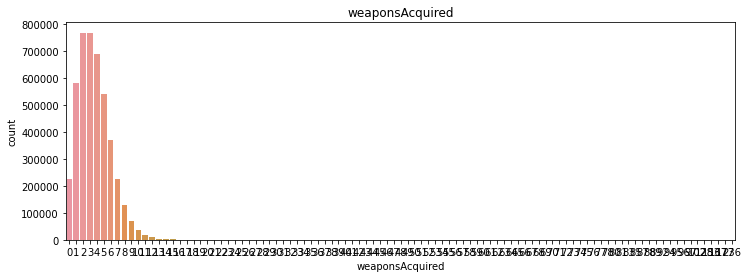

In [ ]:
show_countplot('weaponsAcquired')

In [ ]:
# 무기를 25개이상 줍는다? 뭐하는 애들이지
ex = train.query('weaponsAcquired > 25')
ex

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,total_distance
1292,919f57a28a5e02,79a34f910375bc,b181e5bc4f0c1d,6,0,1750.0,0,6,2,7,0,15,3,69.88,1034,normal-squad-fpp,8,8,1500,0,1657.00,0,0.00,0,0,1137.00,43,0,0.7143,2794.00
2769,89120d2f4e44e0,fa54efeb11b8a6,662c9c7f9e87d0,4,0,970.5,6,4,17,4,1000,11,2,21.61,1263,normal-duo,7,7,-1,2,0.00,0,0.00,0,0,90.79,28,1500,1.0000,90.79
13418,e17aabeb0af04d,5a8a87a3c05a02,6bc71df7f5fcba,3,0,1169.0,0,4,0,8,1000,14,2,121.80,769,normal-squad-fpp,8,8,-1,0,0.00,0,0.00,0,0,122.90,26,1500,0.8571,122.90
14404,504befe1cc25e2,6dcd8c5ad01853,313c9787226bbe,1,0,829.1,9,4,5,35,0,7,1,21.77,1198,normal-squad-fpp,7,7,1500,0,0.00,0,0.00,0,0,1742.00,28,0,0.6667,1742.00
18041,5eee942f2b6d79,325464bcf4c846,f3a64f99badeca,0,0,198.0,0,0,0,4,0,0,0,0.00,1659,solo,19,1,1500,0,81.13,0,0.00,0,0,776.50,28,0,0.0000,857.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426908,b44116139a0746,eddfc937ecaeb1,7d2fd7f5d4f8b2,3,1,1000.0,10,1,0,13,0,12,2,39.00,1195,normal-squad-fpp,6,6,1500,4,0.00,0,0.00,0,0,191.10,28,0,1.0000,191.10
4427592,25cfb10fe2ab37,9c82bece9f9188,f0d57afd891ebf,1,2,215.2,0,0,1,13,1165,2,1,187.40,1712,duo-fpp,47,44,-1,0,3869.00,0,20.43,0,0,2952.00,26,1432,1.0000,6841.43
4427700,0a30aa920382e7,6746d691ea319c,c4abb3540ed3c2,3,0,332.0,0,0,0,51,0,2,1,18.17,597,normal-squad-fpp,15,15,1500,0,1939.00,0,0.00,0,0,1206.00,26,0,0.5000,3145.00
4429697,6cc9d7b1643cbd,11fce60d5c8ea3,60c6e90b964266,3,0,645.6,6,1,0,28,0,5,2,57.58,1216,normal-squad-fpp,6,6,1500,2,0.00,0,0.00,0,0,0.00,31,0,1.0000,0.00


In [ ]:
# 무기를 많이 줍는 애들의 순위 평균이 낮은수준은 아니다 --> 존버충들이 오래살아있으면서 무기도 많이 줍는다고 생각할 수 있다
ex.winPlacePerc.mean()

0.5552904391328511

In [ ]:
# 무기를 먹었는데 이동거리가 0이다? 이건 에바지
# 낙하산 떨어진 지점에 정확히 무기가 있어서 먹었는데 바로 죽은 경우를 생각해서 무기습득을 1보다 크게 잡았다
exindex = train.query('weaponsAcquired > 1 and total_distance < 1').index
train = train.drop(exindex)
exindex

Int64Index([    846,    1357,    1824,    2640,    3826,    4737,    6673,
               7327,    7776,    7812,
            ...
            4441511, 4441545, 4441570, 4441644, 4442729, 4443136, 4444608,
            4445068, 4446318, 4446682],
           dtype='int64', length=7255)

### 스피드핵 --> 스피드핵이 탈것을 탈거라고 생각되지는 않는다 걷기나 수영거리로 판단해보자

* 수영 기본속도 --> 3.3 m/s
* 달리기 기본속도 --> 6.0 m/s

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


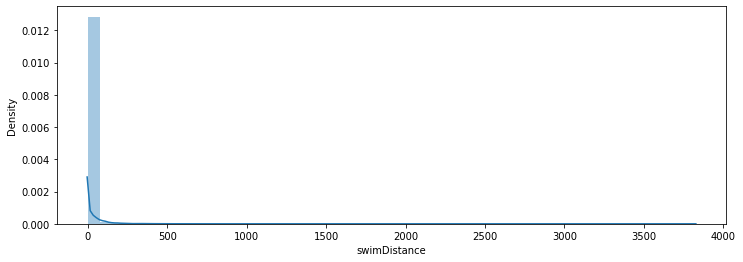

In [ ]:
show_distplot('swimDistance')

In [ ]:
# 게임 시작할때부터 끝까지 수영만 해도 달성하지 못할 수영거리가 있다.
train['swimmer'] = 3.3 * train.matchDuration
exindex = train.query('swimmer < swimDistance').index
train = train.drop(exindex)
exindex

Int64Index([1227362], dtype='int64')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


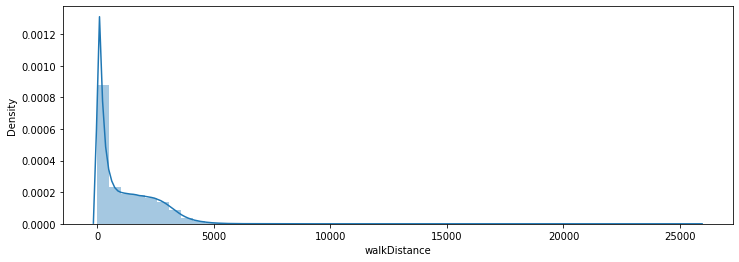

In [ ]:
show_distplot('walkDistance')

In [ ]:
# 게임시작 부터 끝까지 달리기만 해도 달성하지 못할 걸은거리가 있다.
train['hiker'] = 6 * train.matchDuration
exindex = train.query('hiker < walkDistance').index
train = train.drop(exindex)
exindex

Int64Index([  23026,   42183,   68590,  125103,  179341,  250629,  297474,
             326613,  326773,  412967,
            ...
            4106226, 4259976, 4287887, 4288445, 4306598, 4318693, 4380785,
            4382774, 4405009, 4415088],
           dtype='int64', length=139)

## 제출

In [ ]:
train.drop(['Id','groupId','matchId','hiker','swimmer','total_distance','heals_boosts'], axis = 1, inplace = True)
test.drop(['Id','groupId','matchId','total_distance'], axis = 1, inplace = True)

In [ ]:
train = pd.get_dummies(train, columns=['matchType'])
test = pd.get_dummies(test, columns = ['matchType'])

In [ ]:
x_train = train.drop(['winPlacePerc'], axis = 1)
y_train = train.winPlacePerc

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
test['winPlacePerc'] = lr.predict(test)

In [ ]:
test2 = pd.read_csv('test_V2.csv.zip')
test['Id'] = test2['Id']

In [ ]:
submission = pd.read_csv('sample_submission_V2.csv.zip')

In [ ]:
submission

,Id,winPlacePerc
0,9329eb41e215eb,0.191694
1,639bd0dcd7bda8,0.925974
2,63d5c8ef8dfe91,0.466032
3,cf5b81422591d1,0.517204
4,ee6a295187ba21,0.962933
...,...,...
1934169,a316c3a13887d5,0.623755
1934170,5312146b27d875,0.413684
1934171,fc8818b5b32ad3,0.814674
1934172,a0f91e35f8458f,0.778642


In [ ]:
submission.to_csv('submission.csv', index = False)

In [ ]:
!kaggle competitions submit  -c pubg-finish-placement-prediction -f submission.csv -m "Message"

100% 63.1M/63.1M [00:00<00:00, 86.4MB/s]
400 - Bad Request
